In [54]:
import os
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

# Combine Overlap

In [92]:
Exp_Res = []
for file in os.listdir("../results/NetHEPT/"):
    if "influence" in file:
        Exp_Res.append(file)

In [93]:
tag_data = {}
for file in Exp_Res:
    tag = file[18:93]
    with open("../results/NetHEPT/"+file, "rb") as f:
        data = pkl.load(f)
        tag_data[tag]=[x[1] for x in data.values()]

In [94]:
with open("../SOTA_IMM/NetHEPT_imm_infs.pkl", "rb") as f:
    IMM = pkl.load(f)
IMM_Inf = [x[1] for x in IMM.values()]

In [104]:
with open("../results/NetHEPT/Once_Once_0.0001_10.0_30_4_[2]_[0.5]_-2.pkl", "rb") as f:
    Once = pkl.load(f)

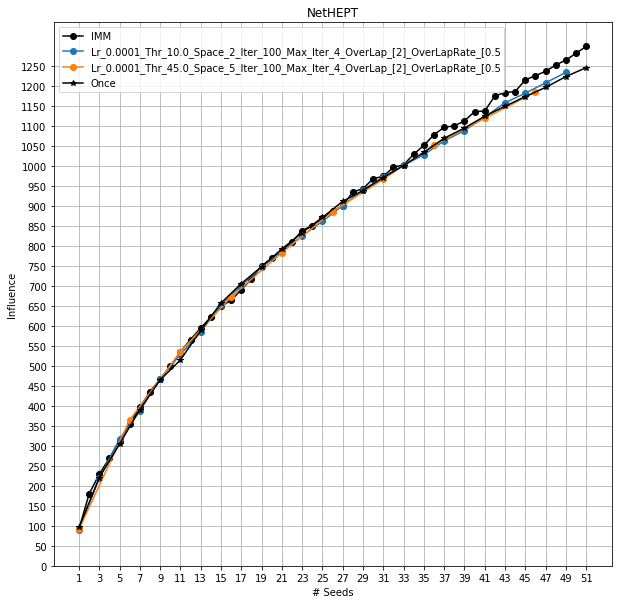

In [105]:
plt.figure(figsize=(10, 10))

IMM_x = range(1, len(IMM_Inf)+1)
plt.plot(IMM_x, IMM_Inf, marker="o", c="k")

EXP_x = range(1, 51, 5)
for tag, y in tag_data.items():
    if "[2]" in tag and "0.5" in tag and "100" in tag:
        if len(y) == len(range(1, 51, 2)):
            plt.plot(range(1, 51, 2), y, marker="o")
        else:
            plt.plot(EXP_x, y, marker="o")
plt.plot(range(1, 52, 2), list(Once.values()), marker="*", c="k")  

plt.xticks(range(1, len(IMM_Inf)+1, 2))
plt.yticks(range(0, 1300, 50))
legend = ["IMM"]
for tag in tag_data.keys():
    if "[2]" in tag and "0.5" in tag and "100" in tag:
        legend.append(tag)

legend.append("Once")
plt.legend(legend)
plt.xlabel("# Seeds")
plt.ylabel("Influence")

plt.title("NetHEPT")
plt.grid(True)
plt.savefig("NetHEPT.pdf")

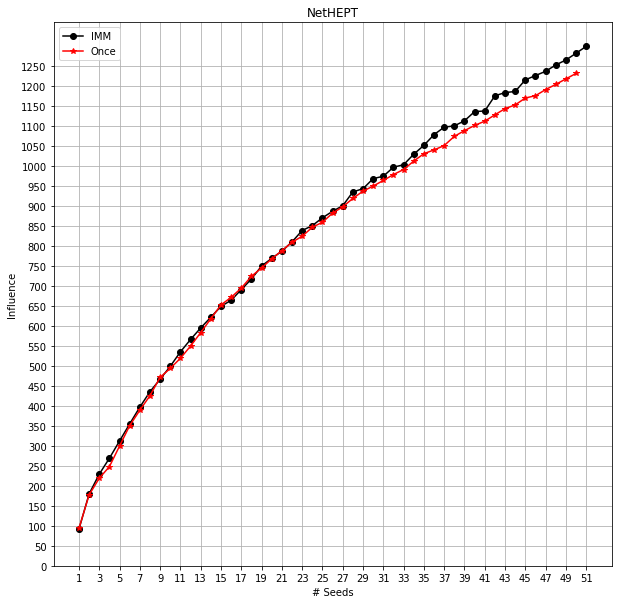

In [114]:
with open("../results/NetHEPT/Once_NetHEPT_0.0001_20_4_2_0.5.pkl", "rb") as f:
    Once = pkl.load(f)
plt.figure(figsize=(10, 10))

IMM_x = range(1, len(IMM_Inf)+1)
plt.plot(IMM_x, IMM_Inf, marker="o", c="k")
plt.plot(range(1, 51, 1), list(Once.values()), marker="*", c="r")  

plt.xticks(range(1, len(IMM_Inf)+1, 2))
plt.yticks(range(0, 1300, 50))
legend = ["IMM"]

legend.append("Once")
plt.legend(legend)
plt.xlabel("# Seeds")
plt.ylabel("Influence")

plt.title("NetHEPT")
plt.grid(True)
plt.savefig("NetHEPT.pdf")